In [45]:
from scipy.stats import pearsonr, spearmanr 
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [30]:
file_dir = './checkpoints/fdgk1_k3_pix2pix_k3_log_transformed_fold1_l1_l2_tumor_SE_16'
mae = os.path.join(file_dir, 'best_model_mae_log.txt')
img_path = os.path.join(file_dir, 'best_model_test_result_mat')
_, _, filenames = next(os.walk(img_path), (None, None, []))

In [8]:
# with open(mae) as f:
#     lines = f.readlines()[1:int(len(filenames)/3 + 1)]
#     patient = [str(line.split(',')[0].strip()) for line in lines]
#     n_voxel = [int(line.split(',')[1].strip()) for line in lines]
#     y = [float(line.split(',')[2].strip()) for line in lines]

In [31]:
# natural sort according to the slice number
import re
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

filenames = natural_sort(filenames)
patientName = [x.split('_')[1] if len(x.split('_')) ==3 else '_'.join(x.split('_')[1:3]) for x in filenames]
patientNameUnique = list(set(patientName))
patientNameUnique.sort()

In [44]:
filenames

['FDGk1k3Pair_Bouey_9.mat',
 'FDGk1k3Pair_Bouey_10.mat',
 'FDGk1k3Pair_Bouey_11.mat',
 'FDGk1k3Pair_Bouey_12.mat',
 'FDGk1k3Pair_Bouey_13.mat',
 'FDGk1k3Pair_Bouey_14.mat',
 'FDGk1k3Pair_Bouey_15.mat',
 'FDGk1k3Pair_Bouey_16.mat',
 'FDGk1k3Pair_Bouey_17.mat',
 'FDGk1k3Pair_Bouey_18.mat',
 'FDGk1k3Pair_Bouey_19.mat',
 'FDGk1k3Pair_Bouey_20.mat',
 'FDGk1k3Pair_Bouey_21.mat',
 'FDGk1k3Pair_Bouey_22.mat',
 'FDGk1k3Pair_Bouey_23.mat',
 'FDGk1k3Pair_Bouey_24.mat',
 'FDGk1k3Pair_Brann_22.mat',
 'FDGk1k3Pair_Brann_23.mat',
 'FDGk1k3Pair_Brann_24.mat',
 'FDGk1k3Pair_Brann_25.mat',
 'FDGk1k3Pair_Brann_26.mat',
 'FDGk1k3Pair_Brann_27.mat',
 'FDGk1k3Pair_Brann_28.mat',
 'FDGk1k3Pair_Brann_29.mat',
 'FDGk1k3Pair_Brann_30.mat',
 'FDGk1k3Pair_Brann_31.mat',
 'FDGk1k3Pair_Brann_32.mat',
 'FDGk1k3Pair_Brann_33.mat',
 'FDGk1k3Pair_Dodes_34.mat',
 'FDGk1k3Pair_Dodes_35.mat',
 'FDGk1k3Pair_Dodes_36.mat',
 'FDGk1k3Pair_Dodes_37.mat',
 'FDGk1k3Pair_Dodes_38.mat',
 'FDGk1k3Pair_Dodes_39.mat',
 'FDGk1k3Pair_D

In [43]:
loadmat(os.path.join(img_path, filenames[0]))['FDGk1k3Pair_Bouey_{}_real_A'.format(9)].squeeze()

array([[[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]], dtype=float32)

In [134]:
import re
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)
data = {}
for i in range(1, 6):
    file_dir = f'./checkpoints/fdgk1_k3_pix2pix_k3_log_transformed_fold{i}_l1_l2_tumor_SE_16'
    img_path = os.path.join(file_dir, 'best_model_test_result_mat')
    _, _, filenames = next(os.walk(img_path), (None, None, []))
    filenames = natural_sort(filenames)
    patientName = [x.split('_')[1] if len(x.split('_')) ==3 else '_'.join(x.split('_')[1:3]) for x in filenames]
    patientNameUnique = list(set(patientName))
    patientNameUnique.sort()
    data_temp = {}
    for pid, patient in enumerate(patientNameUnique):
        patient_data = {}
        #slice_nums = [x[:-4].split('_')[2] if len(x.split('_')) == 3 else x[:-4].split('_')[3] for x in filenames if patient in x]
        filenames_patient = [x for x in filenames if patient in x]
        FDG_slices = np.zeros((len(filenames_patient), 32, 32))
        k1_slices = np.zeros((len(filenames_patient), 32, 32))
        real_k3_slices = np.zeros((len(filenames_patient), 32, 32))
        fake_k3_slices = np.zeros((len(filenames_patient), 32, 32))
        for n_slice, fname_patient in enumerate(filenames_patient):
            img_mat = loadmat(os.path.join(img_path, fname_patient))
            FDG_slices[n_slice,:,:] = img_mat[fname_patient[:-4] + '_real_A'].squeeze()[0,:,:]
            k1_slices[n_slice,:,:] = img_mat[fname_patient[:-4] + '_real_A'].squeeze()[1,:,:]
            real_k3_slices[n_slice,:,:] = img_mat[fname_patient[:-4] + '_real_B'].squeeze()
            fake_k3_slices[n_slice,:,:] = img_mat[fname_patient[:-4] + '_fake_B'].squeeze()
        patient_data['FDG'] = FDG_slices
        patient_data['k1'] = k1_slices
        patient_data['real_k3'] = real_k3_slices
        patient_data['fake_k3'] = fake_k3_slices
        data_temp[f'P{pid+1}_{patient}'] = patient_data
    data[i] = data_temp



In [133]:
img_mat[fname_patient[:-4] + '_real_A'].squeeze()[1,:,:].max()

-0.35412478

In [129]:
img_mat[fname_patient[:-4] + '_fake_B'].squeeze().max()

0.6242076

In [127]:
fake_k3_slices[n_slice,:,:].sum()

-986.9700879454613

In [104]:
img_mat[fname_patient[:-4] + '_fake_B'].squeeze()

array([[-0.99999994, -1.        , -1.        , ..., -0.9999992 ,
        -0.99988794, -0.99996483],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.99999946],
       ...,
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.9999886 ]], dtype=float32)

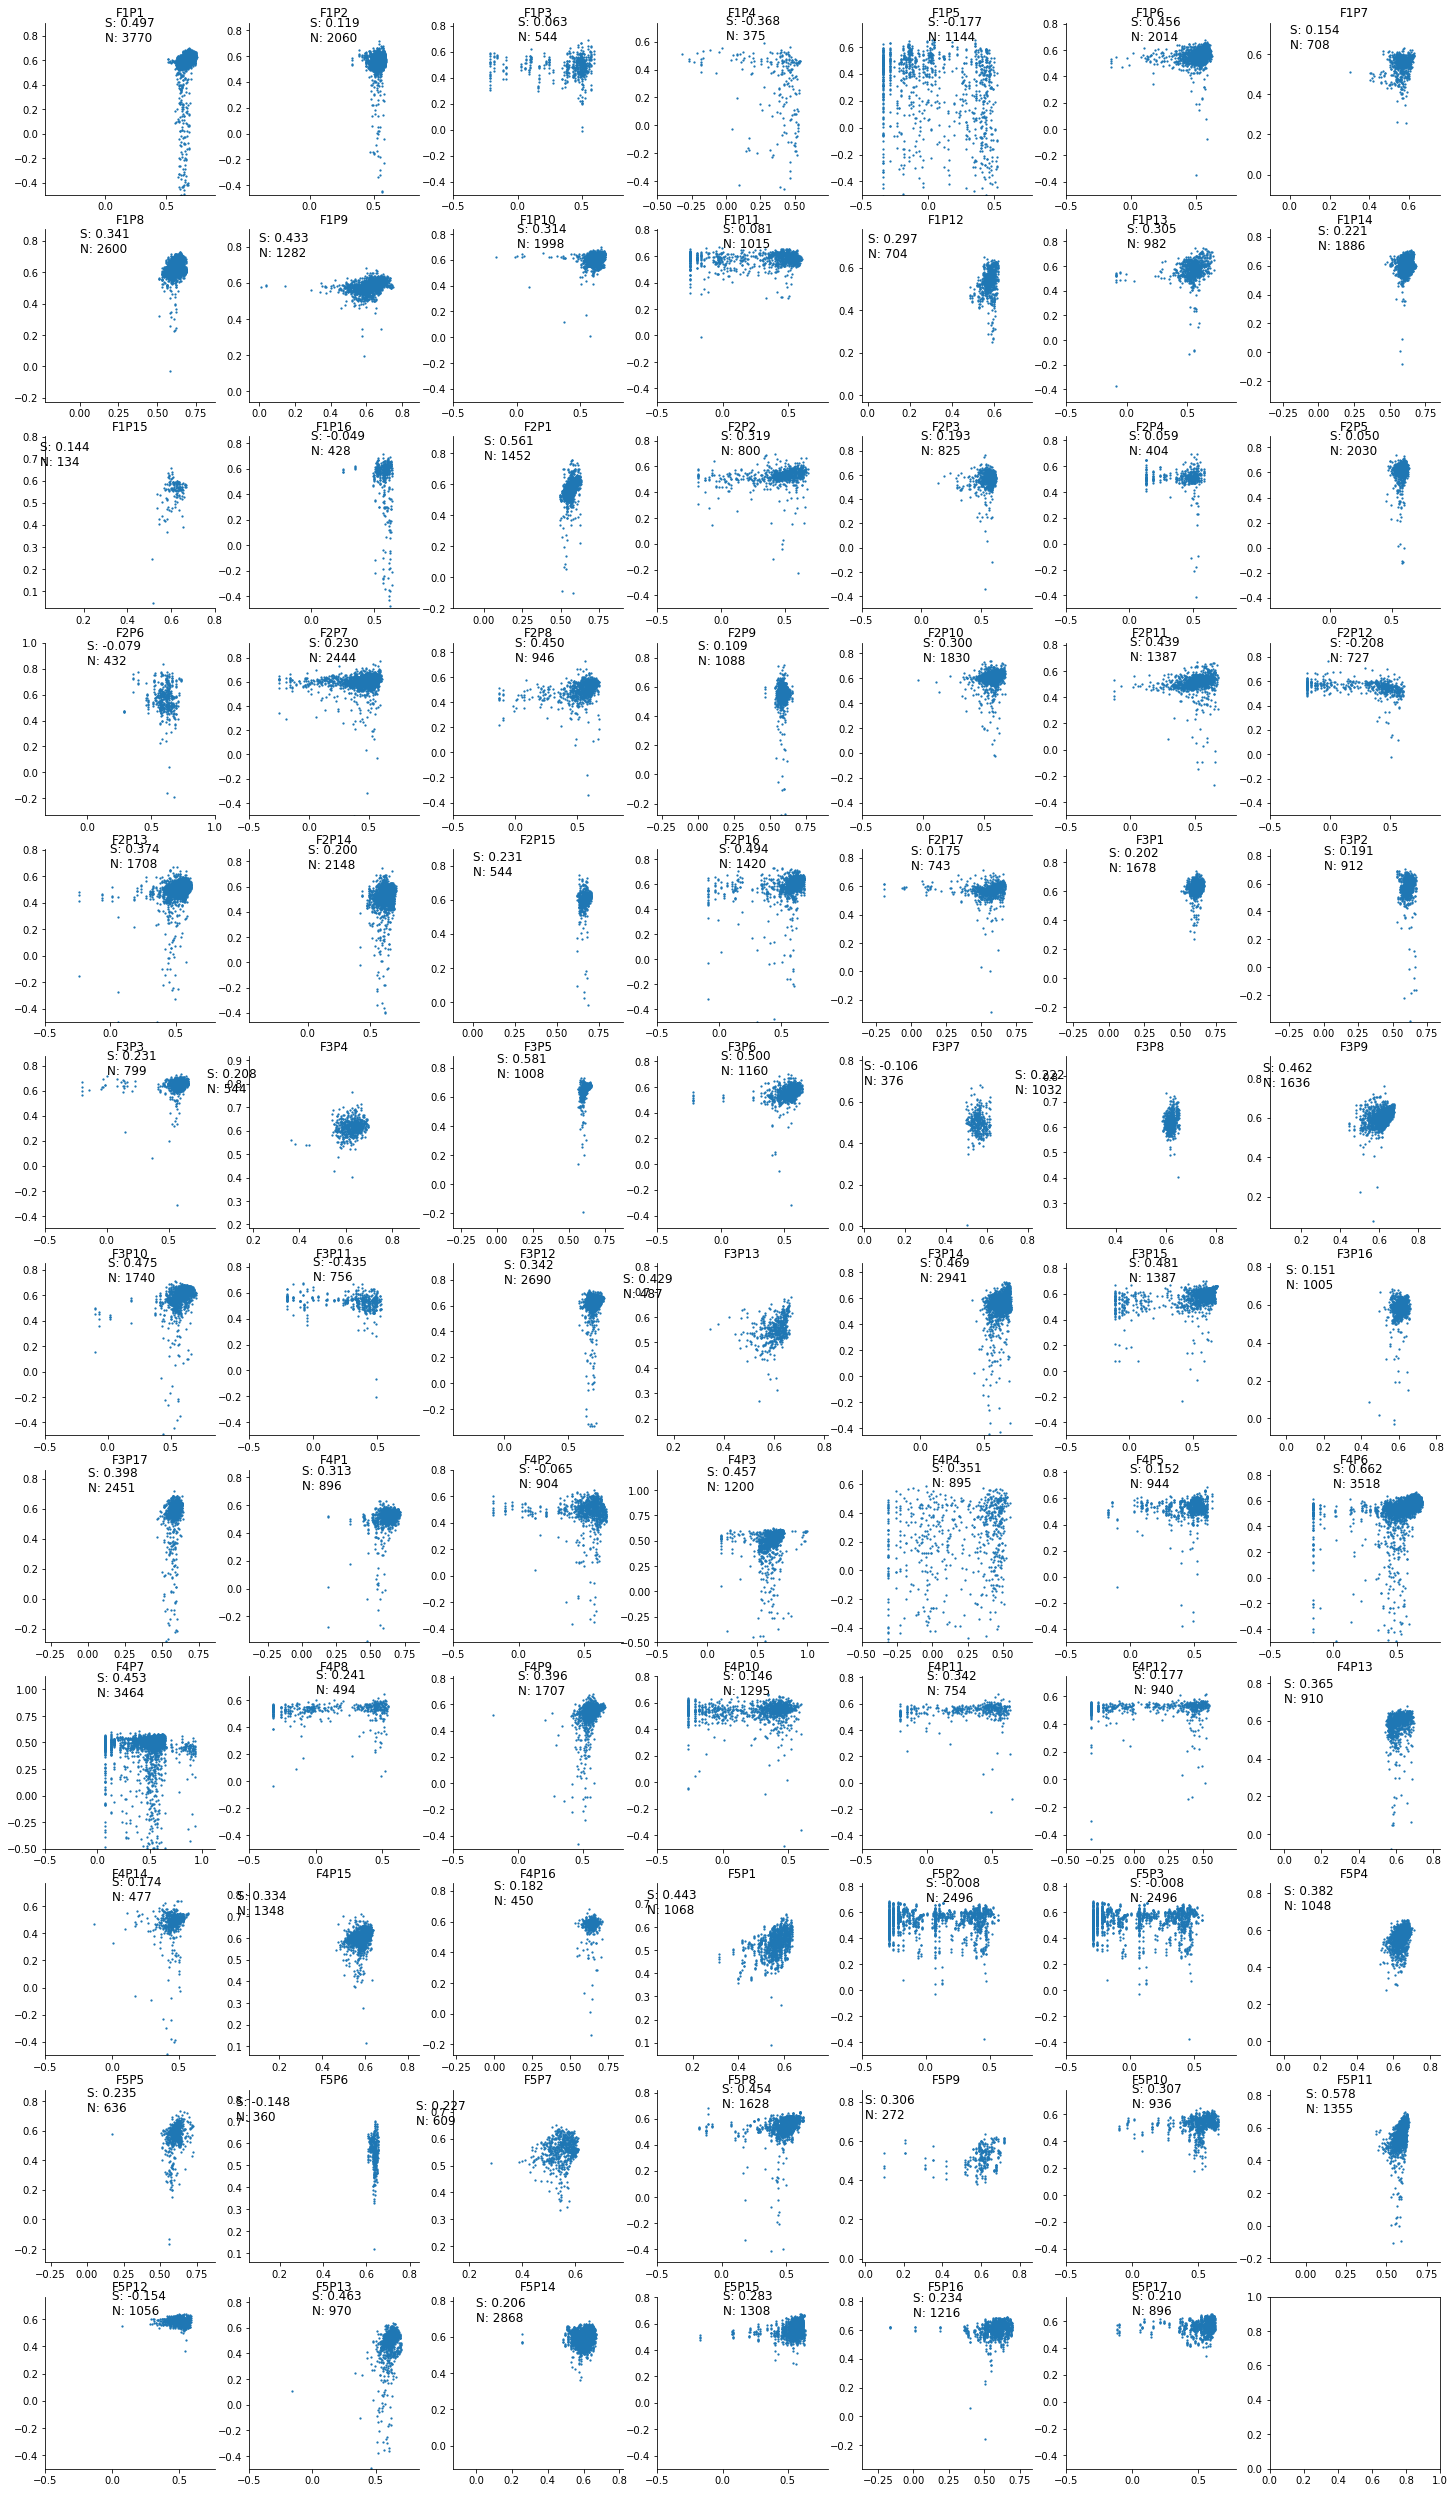

In [138]:
fig, axs = plt.subplots(12, 7, figsize=(25,45))
axs = axs.flatten()
patient_num_by_fold = [len(data[i]) for i in range(1,6)]
pearson_corr_dict = {}
spearman_corr_dict = {}
n_voxel_dict ={}
for i in range(1, 6):
    data_fold = data[i]
    for id, (key, item) in enumerate(data_fold.items()):
        pid_str = key.split('_')[0]
        k1 = item['k1']
        real_k3 = item['real_k3']
        fake_k3 = item['fake_k3']
        mask = k1>-1
        real_k3_tumor = real_k3[mask]
        fake_k3_tumor = fake_k3[mask]
        plot_id = sum(patient_num_by_fold[:i-1]) + id
        axs[plot_id].scatter(real_k3_tumor, fake_k3_tumor , s=1.5,)
        axs[plot_id].set_title(f'F{i}{pid_str}')
        range_min = min(real_k3_tumor.min(), fake_k3_tumor.min())
        range_max = max(fake_k3_tumor.max(), real_k3_tumor.max())
        axs[plot_id].set_xlim([0.5*range_min, 1.2*range_max])
        axs[plot_id].set_ylim([0.5*range_min, 1.2*range_max])
        pearson_corr, _ = pearsonr(real_k3_tumor, fake_k3_tumor)
        spearman_corr,_ = spearmanr(real_k3_tumor, fake_k3_tumor)
        n_voxel = len(real_k3_tumor)
        axs[plot_id].text(0, 1*range_max, 'S: {:.3f}\nN: {}'.format(spearman_corr, n_voxel), size='large')
        #axs[plot_id].text(0.5*range_max, 1*range_max, 'S: {:.3f}'.format(spearman_corr), size='large')
        axs[plot_id].spines["right"].set_visible(False)
        axs[plot_id].spines["top"].set_visible(False)
        
        

In [87]:
real_k3_tumor == fake_k3_tumor

array([ True,  True,  True, ...,  True,  True,  True])

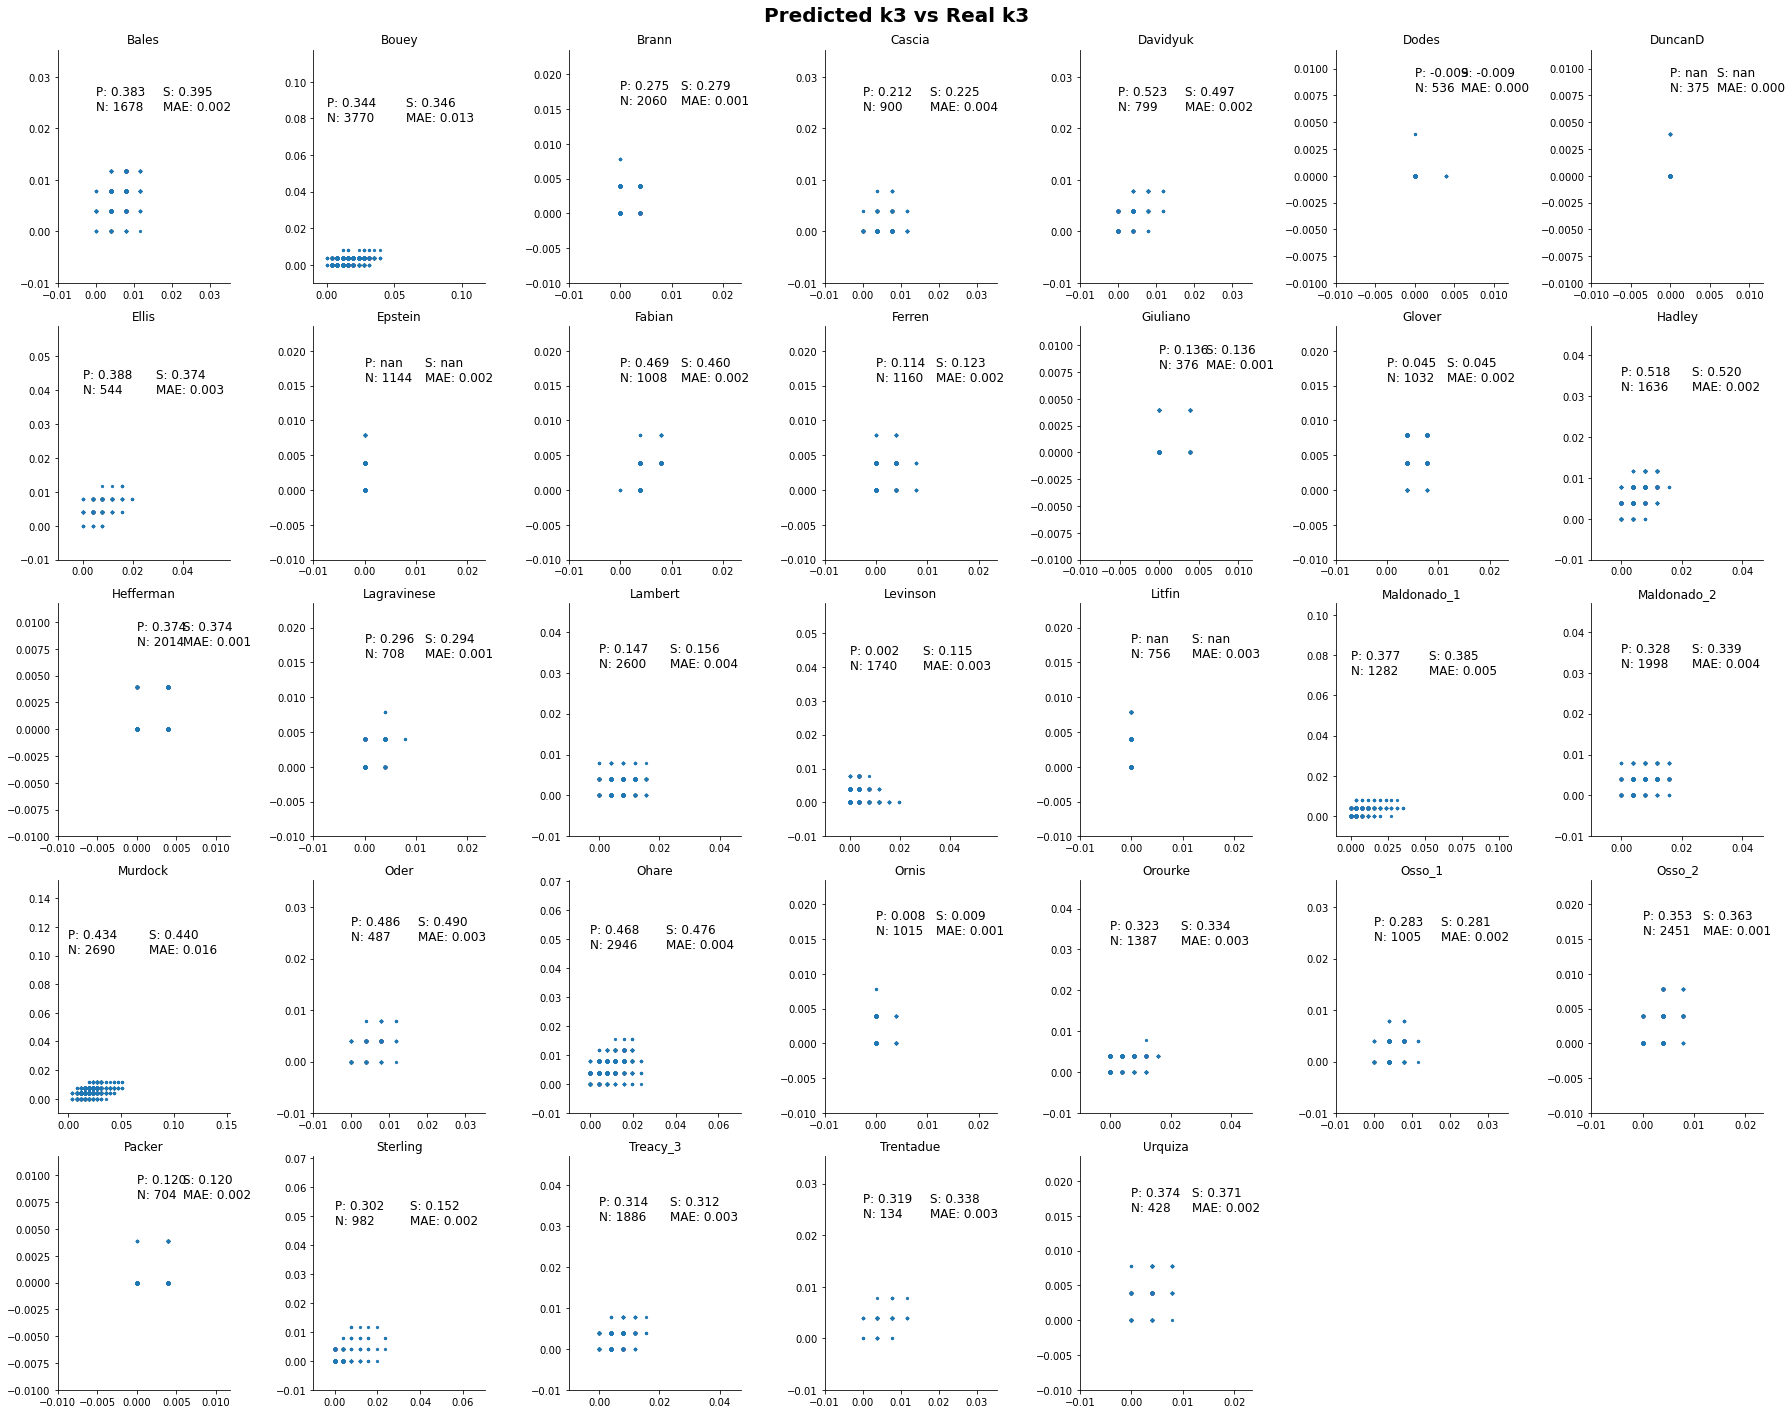

In [ ]:
# ls = sorted(list(fdg_k1_all_tumor.keys())) #patient name list
# a, b = ls.index('Bank_1'), ls.index('Bank_2') 
# ls[b], ls[a] = ls[a], ls[b] #keep same order as matlab plot
name_list = sorted(list(fdgk1_k3_fold1and3.keys()))
id_list = list(range(1, len(name_list)))
fig, axs = plt.subplots(5, 7, figsize=(25,20))
pearson_corr_dict = {}
spearman_corr_dict = {}
n_voxel_dict ={}
mae_dict = {}
axs = axs.flatten()
for i, p in enumerate(ls):
    real_k3 = fdgk1_k3_fold1and3[p][2,:]
    fake_k3 = fdgk1_k3_fold1and3[p][3,:]
    axs[i].scatter(real_k3, fake_k3 , s=5,)
    axs[i].set_title(p)
    range_min = min(real_k3.min(), fake_k3.min())
    range_max = max(fake_k3.max(), real_k3.max())
    axs[i].set_xlim([-0.01, 3*range_max])
    axs[i].set_ylim([-0.01, 3*range_max])
    # axs[i].set_xticklabels([0.4*range_max, 0.8*range_max])
    # axs[i].set_yticklabels([0.4*range_max, 0.8*range_max])
    pearson_corr, _ = pearsonr(real_k3, fake_k3)
    spearman_corr,_ = spearmanr(real_k3, fake_k3)
    n_voxel = len(real_k3)
    mae = np.mean(np.abs(real_k3 - fake_k3))
    axs[i].text(range_min, 2*range_max, 'P: {:.3f}\nN: {}'.format(pearson_corr, n_voxel), size='large')
    axs[i].text(1.5*range_max, 2*range_max, 'S: {:.3f}\nMAE: {:.3f}'.format(spearman_corr, mae), size='large')
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    pearson_corr_dict[p] = pearson_corr
    spearman_corr_dict[p] = spearman_corr
    n_voxel_dict[p] = n_voxel
    mae_dict[p] = mae
fig.suptitle('Predicted k3 vs Real k3', size='20', weight='bold')
axs[-1].set_axis_off()
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [2]:
fdg_k1_dict = {}  #store each tumor as one {patient:[real_fdg,real_k1,fake_k1]}
fdg_k1_with_slice = {} #inclue slice info{patient:{slice_num:[real_fdg,real_k1,fake_k1]}}
for pName in patientNameUnique:
    fdg_real_whole_tumor = []
    k1_real_whole_tumor = []
    k1_fake_whole_tumor = []
    slice_nums = [x.split('_')[2] if len(x.split('_')) == 5 else x.split('_')[3] for x in filenames if pName in x]
    slice_nums = sorted(list(set(slice_nums)))
    temp = {}
    for n in slice_nums:
        name_real_fdg = os.path.join(img_path, 'FDGk1Pair_' + pName + '_' + n + '_real_A' +'.png')
        name_real_k1 = os.path.join(img_path, 'FDGk1Pair_' + pName + '_' + n + '_real_B' +'.png')
        name_fake_k1 = os.path.join(img_path, 'FDGk1Pair_' + pName + '_' + n + '_fake_B' +'.png')
        real_fdg_array = plt.imread(name_real_fdg)[:,:,0]
        real_k1_array = plt.imread(name_real_k1)[:,:,0]
        fake_k1_array = plt.imread(name_fake_k1)[:,:,0]
        real_fdg_tumor = real_fdg_array[real_k1_array>0]
        real_k1_tumor = real_k1_array[real_k1_array>0]
        fake_k1_tumor = fake_k1_array[real_k1_array>0]
        temp[n] = np.concatenate((np.expand_dims(real_fdg_tumor, axis=0), np.expand_dims(real_k1_tumor, axis=0), np.expand_dims(fake_k1_tumor, axis=0)))
        fdg_real_whole_tumor = np.append(fdg_real_whole_tumor, real_fdg_tumor)
        k1_real_whole_tumor = np.append(k1_real_whole_tumor, real_k1_tumor)
        k1_fake_whole_tumor = np.append(k1_fake_whole_tumor, fake_k1_tumor)
    fdg_k1_with_slice[pName] = temp
    fdg_k1_dict[pName] =np.concatenate((np.expand_dims(fdg_real_whole_tumor, axis=0), np.expand_dims(k1_real_whole_tumor, axis=0), np.expand_dims(k1_fake_whole_tumor, axis=0)))

NameError: name 'patientNameUnique' is not defined

In [3]:
fdg_k1_all_tumor = {} #store each tumor as one {patient:[real_fdg,real_k1,fake_k1]}, all tumors
for i in range(1,6):
    file_dir = f'./checkpoints/fdg_k1_pix2pix_no_margin_fold{i}_l1_l2_tumor_SE_16'
    mae = os.path.join(file_dir, 'best_model_mae_log.txt')
    img_path = os.path.join(file_dir, 'best_model_test_result_mat')
    # with open(mae) as f:
    #     lines = f.readlines()[1:]
    #     patient = [str(line.split(',')[0].strip()) for line in lines]
    _, _, filenames = next(os.walk(img_path), (None, None, []))
    filenames.sort()
    patientName = [x.split('_')[1] if len(x.split('_')) ==5 else '_'.join(x.split('_')[1:3]) for x in filenames]
    patientNameUnique = list(set(patientName))
    patientNameUnique.sort()
    for pName in patientNameUnique:
        fdg_real_whole_tumor = []
        k1_real_whole_tumor = []
        k1_fake_whole_tumor = []
        slice_nums = [x.split('_')[2] if len(x.split('_')) == 5 else x.split('_')[3] for x in filenames if pName in x]
        slice_nums = sorted(list(set(slice_nums)))
        # temp = {}
        for n in slice_nums:
            name_real_fdg = os.path.join(img_path, 'FDGk1Pair_' + pName + '_' + n + '_real_A' +'.png')
            name_real_k1 = os.path.join(img_path, 'FDGk1Pair_' + pName + '_' + n + '_real_B' +'.png')
            name_fake_k1 = os.path.join(img_path, 'FDGk1Pair_' + pName + '_' + n + '_fake_B' +'.png')
            real_fdg_array = plt.imread(name_real_fdg)[:,:,0]
            real_k1_array = plt.imread(name_real_k1)[:,:,0]
            fake_k1_array = plt.imread(name_fake_k1)[:,:,0]
            real_fdg_tumor = real_fdg_array[real_k1_array>0]
            real_k1_tumor = real_k1_array[real_k1_array>0]
            fake_k1_tumor = fake_k1_array[real_k1_array>0]
            # temp[n] = np.concatenate((np.expand_dims(real_fdg_tumor, axis=0), np.expand_dims(real_k1_tumor, axis=0), np.expand_dims(fake_k1_tumor, axis=0)))
            fdg_real_whole_tumor = np.append(fdg_real_whole_tumor, real_fdg_tumor)
            k1_real_whole_tumor = np.append(k1_real_whole_tumor, real_k1_tumor)
            k1_fake_whole_tumor = np.append(k1_fake_whole_tumor, fake_k1_tumor)
        # fdg_k1_with_slice[pName] = temp
        fdg_k1_all_tumor[pName] =np.concatenate((np.expand_dims(fdg_real_whole_tumor, axis=0), np.expand_dims(k1_real_whole_tumor, axis=0), np.expand_dims(k1_fake_whole_tumor, axis=0)))


In [4]:
#for fdg,k1 to k3
fdgk1_k3_fold1and3 = {} #store each tumor as one {patient:[real_fdg,real_k1,fake_k1]}, all tumors
for i in [1, 3]:
    file_dir = f'./checkpoints/fdgk1_k3_pix2pix_no_margin_fold{i}_l1_l2_tumor_SE_16'
    mae = os.path.join(file_dir, 'best_model_mae_log.txt')
    img_path = os.path.join(file_dir, 'best_model_test_result')
    # with open(mae) as f:
    #     lines = f.readlines()[1:]
    #     patient = [str(line.split(',')[0].strip()) for line in lines]
    _, _, filenames = next(os.walk(img_path), (None, None, []))
    filenames.sort()
    filename_real_B = [x for x in filenames if 'real_B' in x]
    patientName = [x.split('_')[1] if len(x.split('_')) ==5 else '_'.join(x.split('_')[1:3]) for x in filename_real_B]
    patientNameUnique = list(set(patientName))
    patientNameUnique.sort()
    for pName in patientNameUnique:
        fdg_real_whole_tumor = []
        k1_real_whole_tumor = []
        k3_real_whole_tumor = []
        k3_fake_whole_tumor = []
        slice_nums = [x.split('_')[2] if len(x.split('_')) == 5 else x.split('_')[3] for x in filename_real_B if pName in x]
        slice_nums = sorted(list(set(slice_nums)))
        # temp = {}
        for n in slice_nums:
            name_real_fdg = os.path.join(img_path, 'FDGk1k3Pair_' + pName + '_' + n + '_real_A_1' +'.png')
            name_real_k1 = os.path.join(img_path, 'FDGk1k3Pair_' + pName + '_' + n + '_real_A_2' +'.png')
            name_real_k3 = os.path.join(img_path, 'FDGk1k3Pair_' + pName + '_' + n + '_real_B' +'.png')
            name_fake_k3 = os.path.join(img_path, 'FDGk1k3Pair_' + pName + '_' + n + '_fake_B' +'.png')
            real_fdg_array = plt.imread(name_real_fdg)[:,:,0]
            real_k1_array = plt.imread(name_real_k1)[:,:,0]
            real_k3_array = plt.imread(name_real_k3)[:,:,0]
            fake_k3_array = plt.imread(name_fake_k3)[:,:,0]
            real_fdg_tumor = real_fdg_array[real_k1_array>0]
            real_k1_tumor = real_k1_array[real_k1_array>0]
            real_k3_tumor = real_k3_array[real_k1_array>0]
            fake_k3_tumor = fake_k3_array[real_k1_array>0]
            # temp[n] = np.concatenate((np.expand_dims(real_fdg_tumor, axis=0), np.expand_dims(real_k1_tumor, axis=0), np.expand_dims(fake_k1_tumor, axis=0)))
            fdg_real_whole_tumor = np.append(fdg_real_whole_tumor, real_fdg_tumor)
            k1_real_whole_tumor = np.append(k1_real_whole_tumor, real_k1_tumor)
            k3_real_whole_tumor = np.append(k3_real_whole_tumor, real_k3_tumor)
            k3_fake_whole_tumor = np.append(k3_fake_whole_tumor, fake_k3_tumor)
        # fdg_k1_with_slice[pName] = temp
        fdgk1_k3_fold1and3[pName] =np.concatenate((np.expand_dims(fdg_real_whole_tumor, axis=0), np.expand_dims(k1_real_whole_tumor, axis=0), np.expand_dims(k3_real_whole_tumor, axis=0), np.expand_dims(k3_fake_whole_tumor, axis=0)))


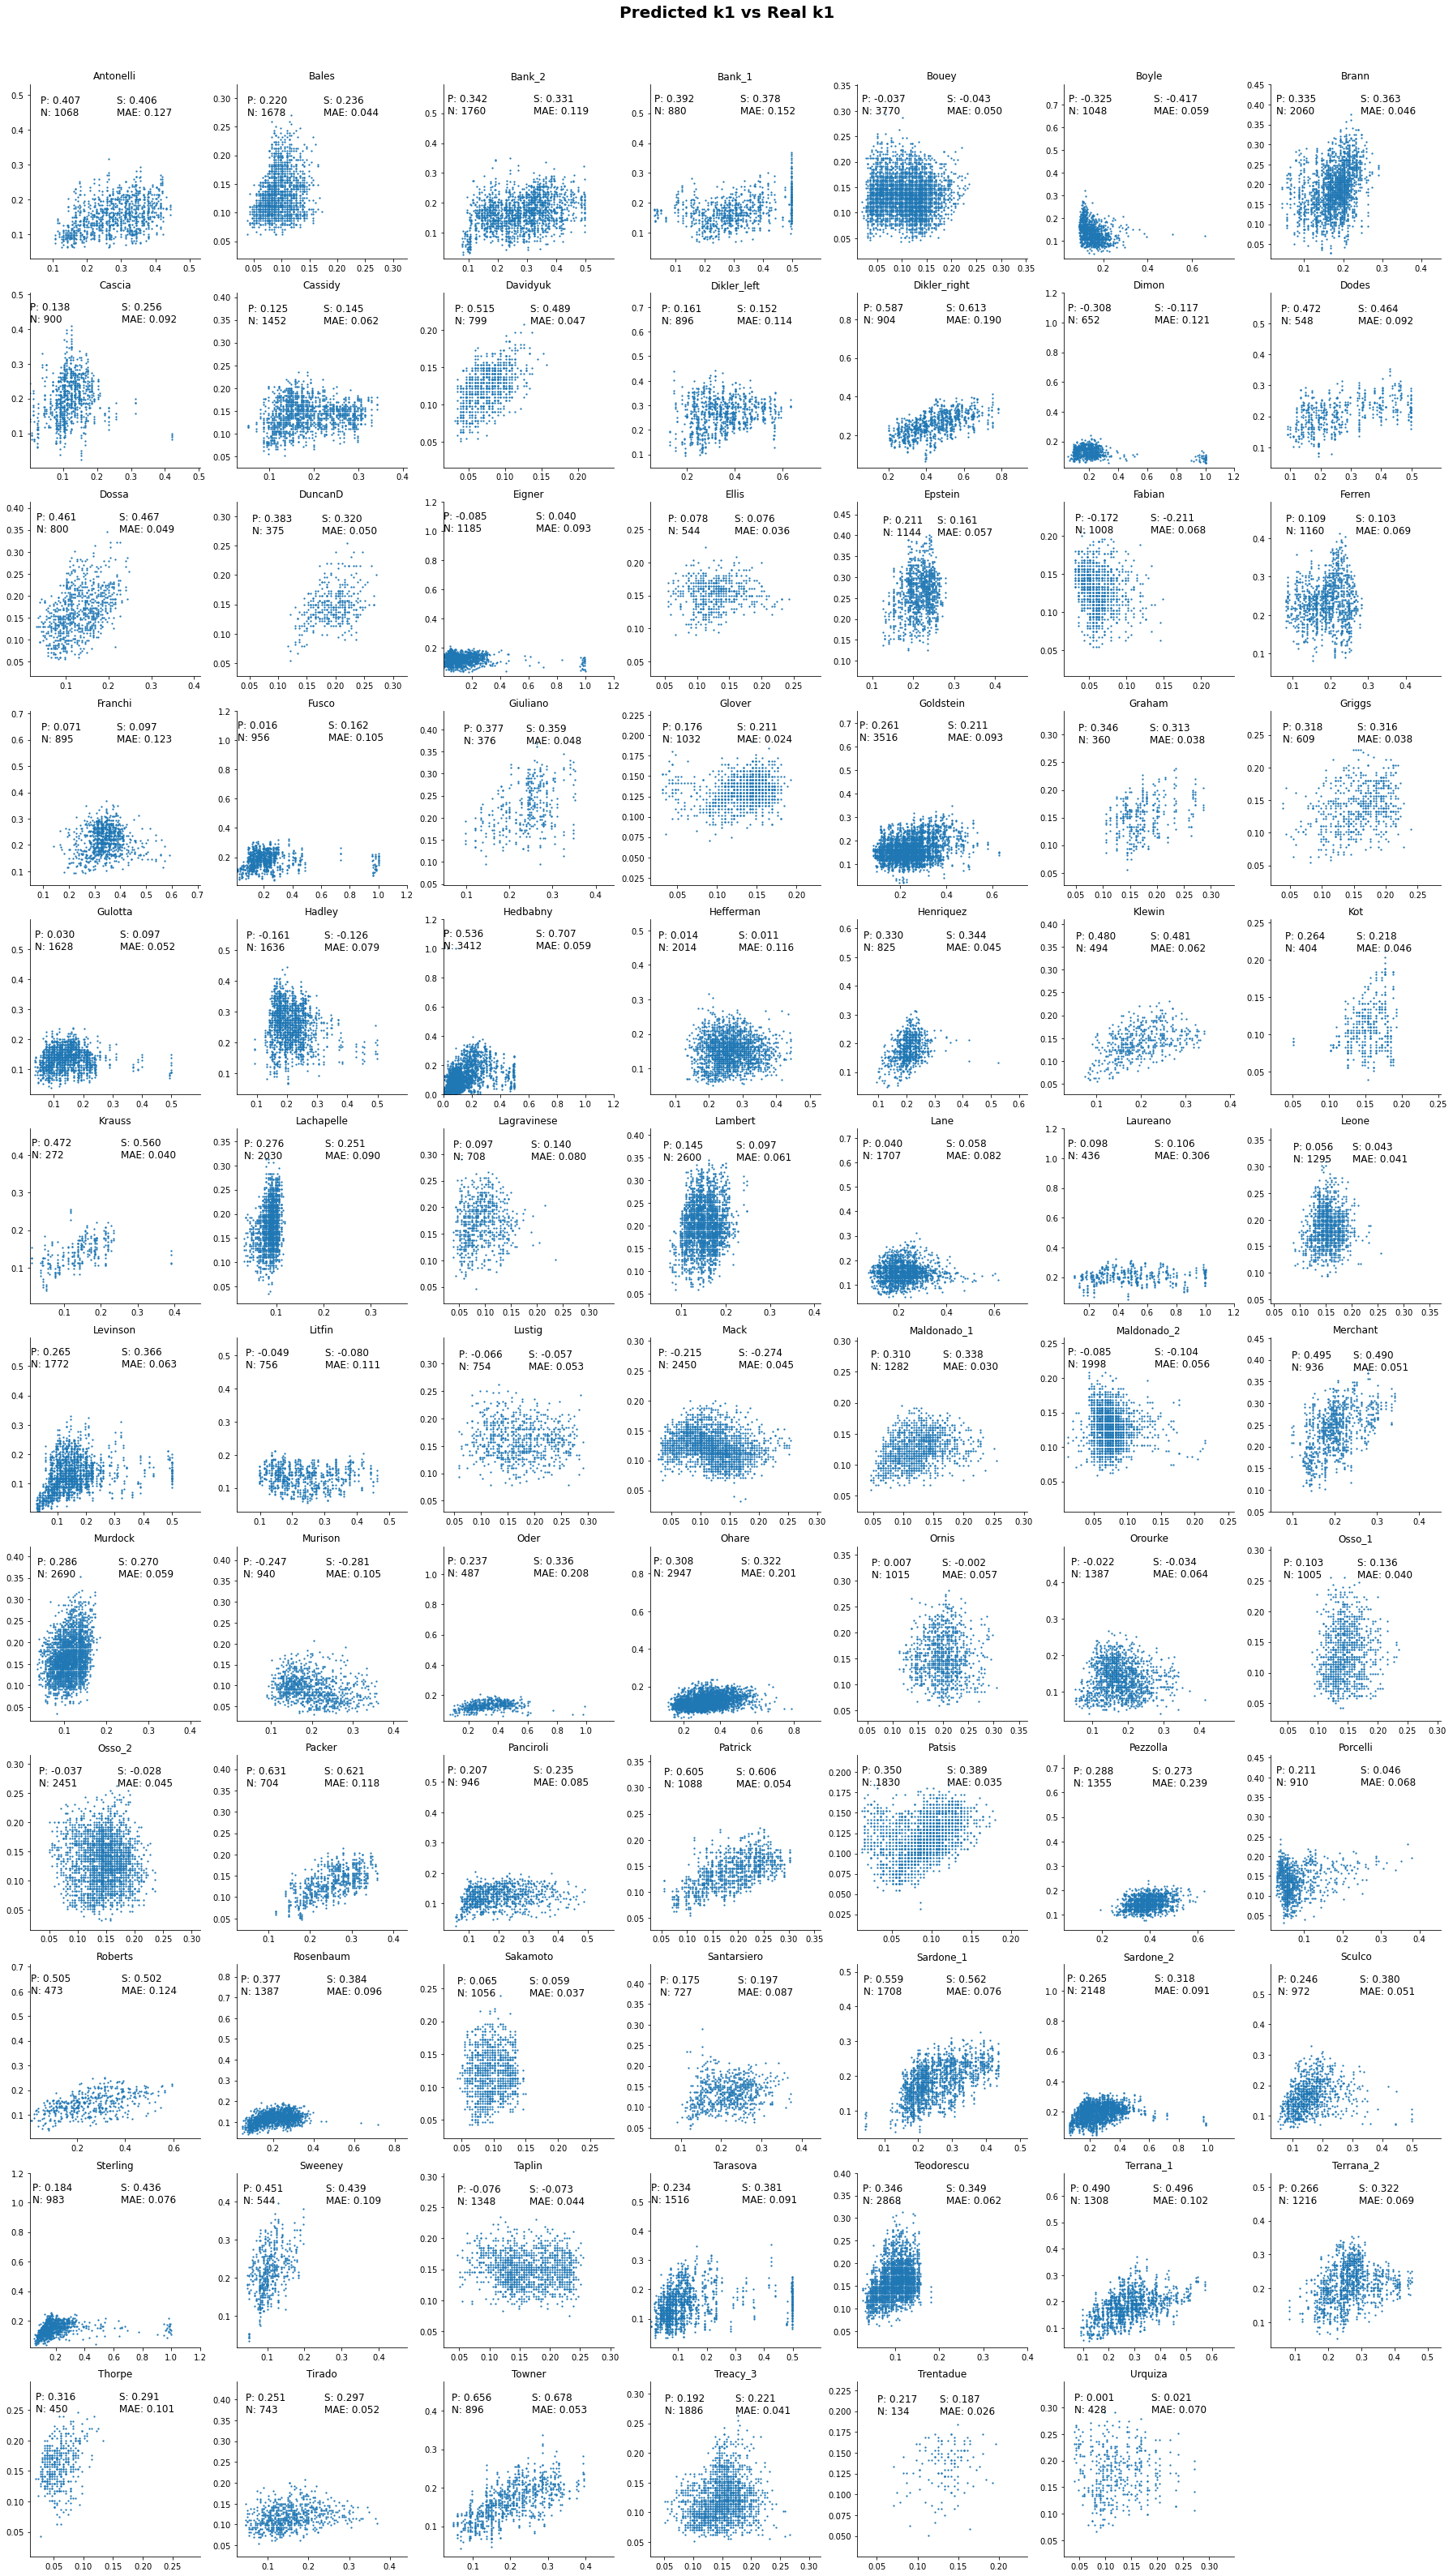

In [5]:
ls = sorted(list(fdg_k1_all_tumor.keys())) #patient name list
a, b = ls.index('Bank_1'), ls.index('Bank_2') 
ls[b], ls[a] = ls[a], ls[b] #keep same order as matlab plot
fig, axs = plt.subplots(12, 7, figsize=(25,45))
pearson_corr_dict = {}
spearman_corr_dict = {}
n_voxel_dict ={}
mae_dict = {}
axs = axs.flatten()
for i, p in enumerate(ls):
    real_k1 = fdg_k1_all_tumor[p][1,:]
    fake_k1 = fdg_k1_all_tumor[p][2,:]
    axs[i].scatter(real_k1, fake_k1 , s=1.5,)
    axs[i].set_title(p)
    range_min = min(real_k1.min(), fake_k1.min())
    range_max = max(fake_k1.max(), real_k1.max())
    axs[i].set_xlim([0.5*range_min, 1.2*range_max])
    axs[i].set_ylim([0.5*range_min, 1.2*range_max])
    # axs[i].set_xticklabels([0.4*range_max, 0.8*range_max])
    # axs[i].set_yticklabels([0.4*range_max, 0.8*range_max])
    pearson_corr, _ = pearsonr(real_k1, fake_k1)
    spearman_corr,_ = spearmanr(real_k1, fake_k1)
    n_voxel = len(real_k1)
    mae = np.mean(np.abs(real_k1 - fake_k1))
    axs[i].text(range_min, 1*range_max, 'P: {:.3f}\nN: {}'.format(pearson_corr, n_voxel), size='large')
    axs[i].text(0.65*range_max, 1*range_max, 'S: {:.3f}\nMAE: {:.3f}'.format(spearman_corr, mae), size='large')
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    pearson_corr_dict[p] = pearson_corr
    spearman_corr_dict[p] = spearman_corr
    n_voxel_dict[p] = n_voxel
    mae_dict[p] = mae
fig.suptitle('Predicted k1 vs Real k1', size='20', weight='bold')
axs[-1].set_axis_off()
fig.tight_layout()
fig.subplots_adjust(top=0.95)

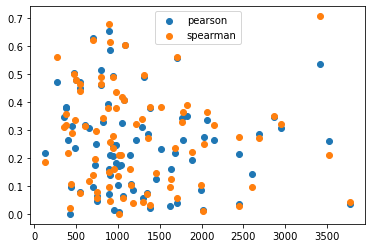

In [10]:
fig, ax = plt.subplots()
ax.scatter(n_voxel_dict.values(), list(map(abs, list(pearson_corr_dict.values()))), label='pearson')
ax.scatter(n_voxel_dict.values(), list(map(abs, list(spearman_corr_dict.values()))), label='spearman')
ax.legend()

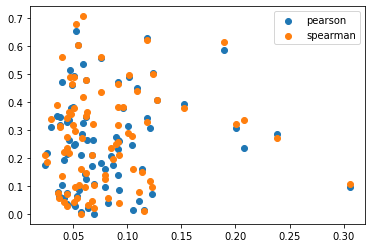

In [11]:
fig, ax = plt.subplots()
ax.scatter(mae_dict.values(), list(map(abs, list(pearson_corr_dict.values()))), label='pearson')
ax.scatter(mae_dict.values(), list(map(abs, list(spearman_corr_dict.values()))), label='spearman')
ax.legend()

(array([6., 7., 7., 3., 4., 5., 6., 6., 7., 6., 6., 4., 1., 1., 5., 3., 1.,
        2., 1., 2.]),
 array([0.00066117, 0.0334101 , 0.06615903, 0.09890796, 0.13165689,
        0.16440582, 0.19715474, 0.22990367, 0.2626526 , 0.29540153,
        0.32815046, 0.36089939, 0.39364831, 0.42639724, 0.45914617,
        0.4918951 , 0.52464403, 0.55739296, 0.59014188, 0.62289081,
        0.65563974]),
 <BarContainer object of 20 artists>)

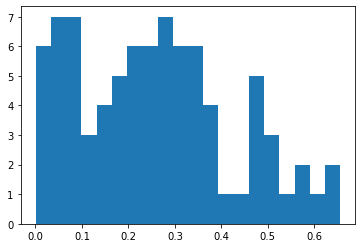

In [97]:
pearson_array = np.array([abs(x) for x in pearson_corr_dict.values()])
np.median(pearson_array)
fig, ax = plt.subplots()
ax.hist(pearson_array, bins=20)

In [102]:
np.min(pearson_array)

0.0006611731640493793

In [99]:
np.array([abs(x) for x in spearman_corr_dict.values()]).mean()

0.2720157464093229

(array([3., 1., 0., 0., 2., 2., 0., 0., 1., 0., 2., 3., 3., 2., 5., 0., 1.,
        2., 1., 2.]),
 array([0.00184389, 0.02787712, 0.05391035, 0.07994358, 0.10597681,
        0.13201004, 0.15804327, 0.1840765 , 0.21010973, 0.23614297,
        0.2621762 , 0.28820943, 0.31424266, 0.34027589, 0.36630912,
        0.39234235, 0.41837558, 0.44440881, 0.47044204, 0.49647527,
        0.5225085 ]),
 <BarContainer object of 20 artists>)

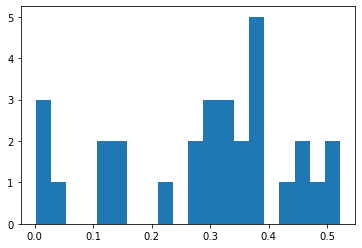

In [32]:
pearson_array = np.array([abs(x) for x in pearson_corr_dict.values()])
np.median(pearson_array)
fig, ax = plt.subplots()
ax.hist(pearson_array, bins=20)

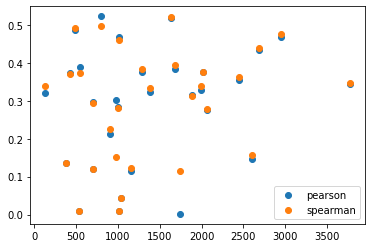

In [33]:
fig, ax = plt.subplots()
ax.scatter(n_voxel_dict.values(), list(map(abs, list(pearson_corr_dict.values()))), label='pearson')
ax.scatter(n_voxel_dict.values(), list(map(abs, list(spearman_corr_dict.values()))), label='spearman')
ax.legend()

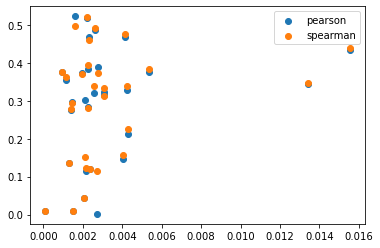

In [34]:
fig, ax = plt.subplots()
ax.scatter(mae_dict.values(), list(map(abs, list(pearson_corr_dict.values()))), label='pearson')
ax.scatter(mae_dict.values(), list(map(abs, list(spearman_corr_dict.values()))), label='spearman')
ax.legend()

In [43]:
#covert fdg_k1_with_slice to fdg_k1_dict
dict_test = {}
for k1, v1 in fdg_k1_with_slice.items():
    temp_array = [[],[],[]]
    for k2, v2 in v1.items():
        temp_array = np.append(temp_array, v2, axis=1)
    dict_test[k1] = temp_array

In [44]:
# check if two dict is the same
l=[]
for key in fdg_k1_dict:
    l.append(np.array_equal(fdg_k1_dict[key], dict_test[key]))
for key in dict_test:
    l.append(np.array_equal(fdg_k1_dict[key], dict_test[key]))
all(l)

True

In [61]:
np.array_equal(fdg_k1_all_tumor[testname], fdg_k1_dict[testname])

True

In [52]:
testname = patientNameUnique[-7]
fdg_k1_dict[testname][1,:].max()

0.21568627655506134

In [8]:
test = plt.imread(os.path.join(img_path, 'FDGk1Pair_Cassidy_25_real_A.png'))

In [42]:
test[:,:,2][test[:,:,1]>0].shape

(148,)

In [23]:
import PIL
test1 = np.array(PIL.Image.open(os.path.join(img_path, 'FDGk1Pair_Cassidy_25_real_A.png')))/255

In [36]:
test1[:,:,2][test1[:,:,2]>0].mean()

0.2113407525172231

In [43]:
np.append([],np.array([1.3, 5]))

array([1.3, 5. ])

In [113]:
img  = plt.imread('/lila/home/zhaow2/pytorch-CycleGAN-and-pix2pix-master/checkpoints/fdgk1_k3_pix2pix_no_margin_fold1_l1_l2_tumor_SE_16/train_real_A/FDGk1k3Pair_Bouey_10_real_A_epoch101.png')